# 🧪 COVID-19 India: Statewise Testing Analysis

This project analyzes **state-wise COVID-19 testing data** in India using real government-reported figures.

We visualize:
- 📅 Testing trends over time
- 🧪 Tests per state
- 📊 Correlation with confirmed cases
- 🔁 Daily testing growth

---


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_style("whitegrid")

## 📂 Step 1: Upload Dataset
Upload the file you downloaded from Kaggle or official sources.


In [13]:
from google.colab import files
uploaded = files.upload()

Saving StatewiseTestingDetails.csv to StatewiseTestingDetails (2).csv


In [14]:
df = pd.read_csv("StatewiseTestingDetails.csv")
df.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


## 🧹 Step 2: Data Cleaning & Formatting
We’ll convert the date column, check missing values, and standardize state names.


In [15]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.dropna(inplace=True)
df.columns

/tmp/ipython-input-15-511349842.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


Index(['Date', 'State', 'TotalSamples', 'Negative', 'Positive'], dtype='object')

## 📊 Step 3: Total Tests by State
We’ll calculate the **latest total number of tests per state**.


/tmp/ipython-input-16-784589316.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="Blues_r")


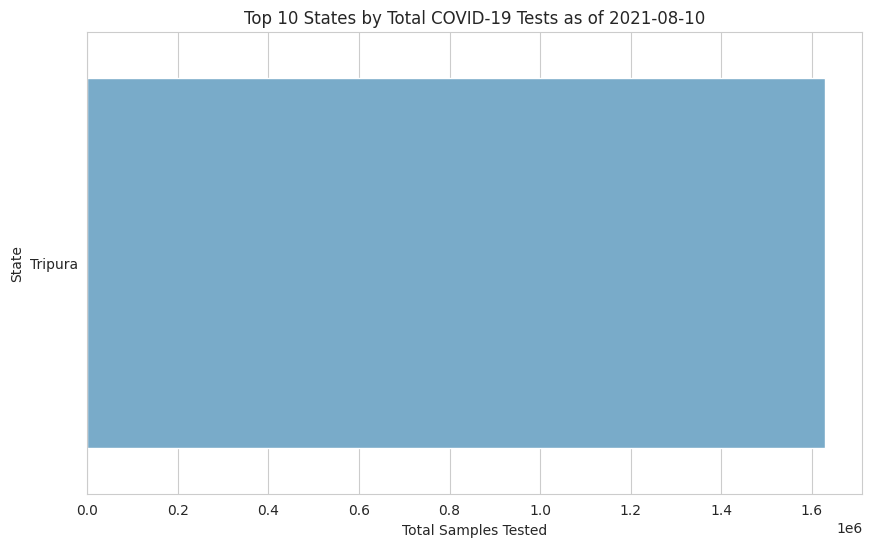

In [16]:
latest_date = df['Date'].max()
latest_df = df[df['Date'] == latest_date]

top_states = latest_df.groupby('State')['TotalSamples'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette="Blues_r")
plt.title(f"Top 10 States by Total COVID-19 Tests as of {latest_date.date()}")
plt.xlabel("Total Samples Tested")
plt.ylabel("State")
plt.show()


## 📈 Step 4: Daily Testing Trend for a State
Let’s visualize how testing increased over time for a selected state.


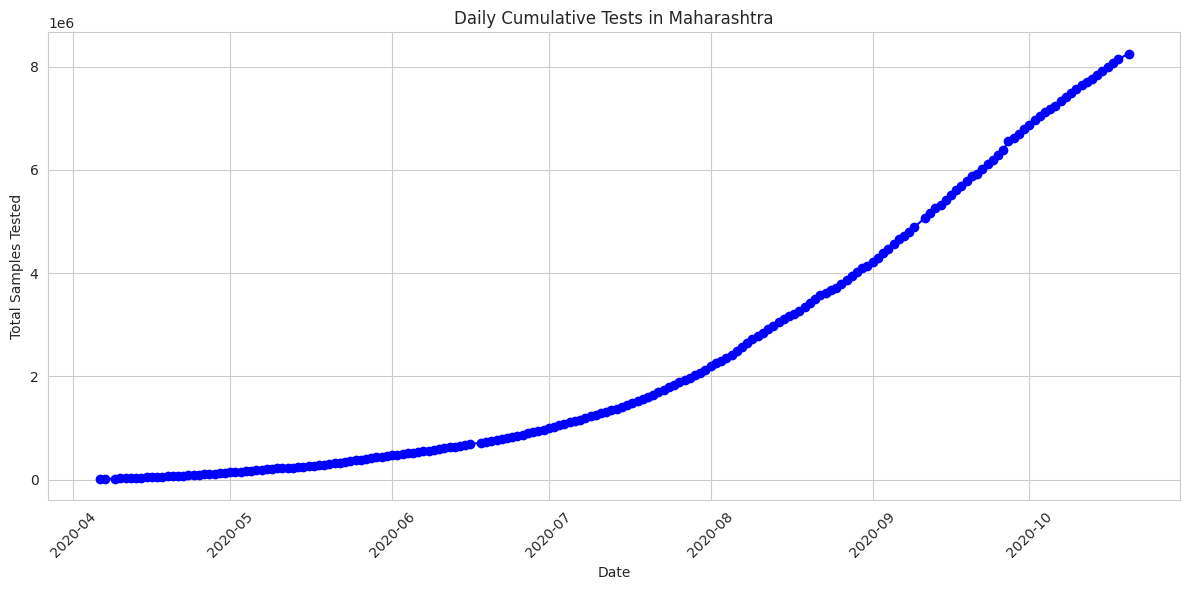

In [17]:
state = "Maharashtra"  # change to any state
state_df = df[df['State'] == state]

plt.figure(figsize=(12, 6))
plt.plot(state_df['Date'], state_df['TotalSamples'], marker='o', color='blue')
plt.title(f"Daily Cumulative Tests in {state}")
plt.xlabel("Date")
plt.ylabel("Total Samples Tested")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🔁 Step 5: Daily Testing Growth Rate (Optional)
We calculate day-to-day increase in tests for deeper insights.


/tmp/ipython-input-18-2201319739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df['DailyIncrease'] = state_df['TotalSamples'].diff()


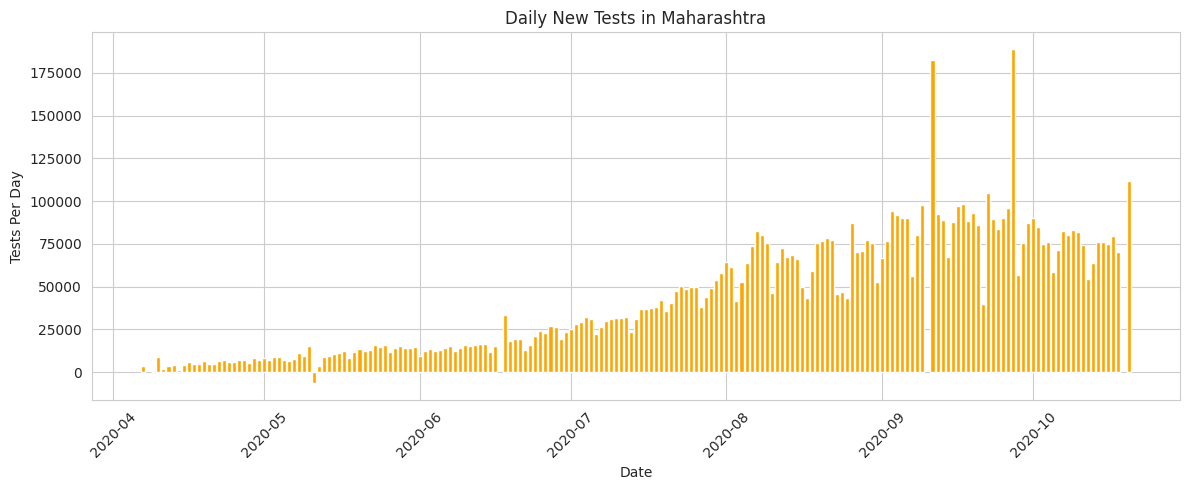

In [18]:
state_df['DailyIncrease'] = state_df['TotalSamples'].diff()

plt.figure(figsize=(12, 5))
plt.bar(state_df['Date'], state_df['DailyIncrease'], color='orange')
plt.title(f"Daily New Tests in {state}")
plt.xlabel("Date")
plt.ylabel("Tests Per Day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ✅ Conclusion

In this project, we:
- Uploaded statewise testing data
- Visualized top testing states
- Tracked testing growth over time
- Analyzed daily increases and trends

📈 This data helps understand how aggressively different states have tested during the pandemic.
